In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [69]:
songpa=pd.read_csv('../data/songpa_merge.csv')
songpa.head()

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2945/860718779.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  songpa=pd.read_csv('../data/songpa_merge.csv')


,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간(분),대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구,date,time,day,return_date,return_time,기온(°C),강수량(mm),습도(%),전운량(10분위),시정(10m),시간,PM10,PM25
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,ST-1864,ST-1864,일반자전거,송파구,송파구,2024-04-01,0,월,2024-04-01,0,9.5,0.0,50,0,2694,0,54.0,13.0
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,1,ST-1584,ST-2596,일반자전거,송파구,송파구,2024-04-01,0,월,2024-04-01,0,9.5,0.0,50,0,2694,0,54.0,13.0
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,2024-04-01 00:05:08,4893.0,문정법조단지12,3,ST-2957,ST-2972,일반자전거,송파구,송파구,2024-04-01,0,월,2024-04-01,0,9.5,0.0,50,0,2694,0,54.0,13.0
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,ST-1719,ST-1719,일반자전거,송파구,송파구,2024-04-01,0,월,2024-04-01,0,9.5,0.0,50,0,2694,0,54.0,13.0
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,8,ST-2581,ST-2598,일반자전거,송파구,송파구,2024-04-01,0,월,2024-04-01,0,9.5,0.0,50,0,2694,0,54.0,13.0


In [70]:
songpa.drop(
    ['습도(%)','전운량(10분위)','시정(10m)'],
    axis=1,
    inplace=True
)

In [71]:
# 모든 열 표시
pd.set_option('display.max_columns', None)

# 출력 너비 제한 해제
pd.set_option('display.width', None)

In [72]:
songpa.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간(분),대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구,date,time,day,return_date,return_time,기온(°C),강수량(mm),시간,PM10,PM25
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,ST-1864,ST-1864,일반자전거,송파구,송파구,2024-04-01,0,월,2024-04-01,0,9.5,0.0,0,54.0,13.0
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,1,ST-1584,ST-2596,일반자전거,송파구,송파구,2024-04-01,0,월,2024-04-01,0,9.5,0.0,0,54.0,13.0
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,2024-04-01 00:05:08,4893.0,문정법조단지12,3,ST-2957,ST-2972,일반자전거,송파구,송파구,2024-04-01,0,월,2024-04-01,0,9.5,0.0,0,54.0,13.0
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,ST-1719,ST-1719,일반자전거,송파구,송파구,2024-04-01,0,월,2024-04-01,0,9.5,0.0,0,54.0,13.0
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,8,ST-2581,ST-2598,일반자전거,송파구,송파구,2024-04-01,0,월,2024-04-01,0,9.5,0.0,0,54.0,13.0


In [73]:
asan_rent=songpa[songpa['대여 대여소명']=='아산병원 기숙사 부근']
asan_return=songpa[songpa['반납대여소명']=='아산병원 기숙사 부근']

In [74]:
asan_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62263 entries, 1047 to 5199692
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자전거번호        62263 non-null  object 
 1   대여일시         62263 non-null  object 
 2   대여 대여소번호     62263 non-null  int64  
 3   대여 대여소명      62263 non-null  object 
 4   반납일시         62263 non-null  object 
 5   반납대여소번호      62027 non-null  float64
 6   반납대여소명       62263 non-null  object 
 7   이용시간(분)      62263 non-null  int64  
 8   대여대여소ID      62263 non-null  object 
 9   반납대여소ID      62263 non-null  object 
 10  자전거구분        49846 non-null  object 
 11  자치구          62263 non-null  object 
 12  반납 자치구       61926 non-null  object 
 13  date         62263 non-null  object 
 14  time         62263 non-null  int64  
 15  day          62263 non-null  object 
 16  return_date  62263 non-null  object 
 17  return_time  62263 non-null  int64  
 18  기온(°C)       62263 non-null  float64
 19  강수량(

In [75]:
asan_return.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66717 entries, 158 to 5199601
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자전거번호        66717 non-null  object 
 1   대여일시         66717 non-null  object 
 2   대여 대여소번호     66717 non-null  int64  
 3   대여 대여소명      66717 non-null  object 
 4   반납일시         66717 non-null  object 
 5   반납대여소번호      66717 non-null  float64
 6   반납대여소명       66717 non-null  object 
 7   이용시간(분)      66717 non-null  int64  
 8   대여대여소ID      66717 non-null  object 
 9   반납대여소ID      66717 non-null  object 
 10  자전거구분        53691 non-null  object 
 11  자치구          66643 non-null  object 
 12  반납 자치구       66717 non-null  object 
 13  date         66717 non-null  object 
 14  time         66717 non-null  int64  
 15  day          66717 non-null  object 
 16  return_date  66717 non-null  object 
 17  return_time  66717 non-null  int64  
 18  기온(°C)       66717 non-null  float64
 19  강수량(m

/opt/anaconda3/lib/python3.12/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


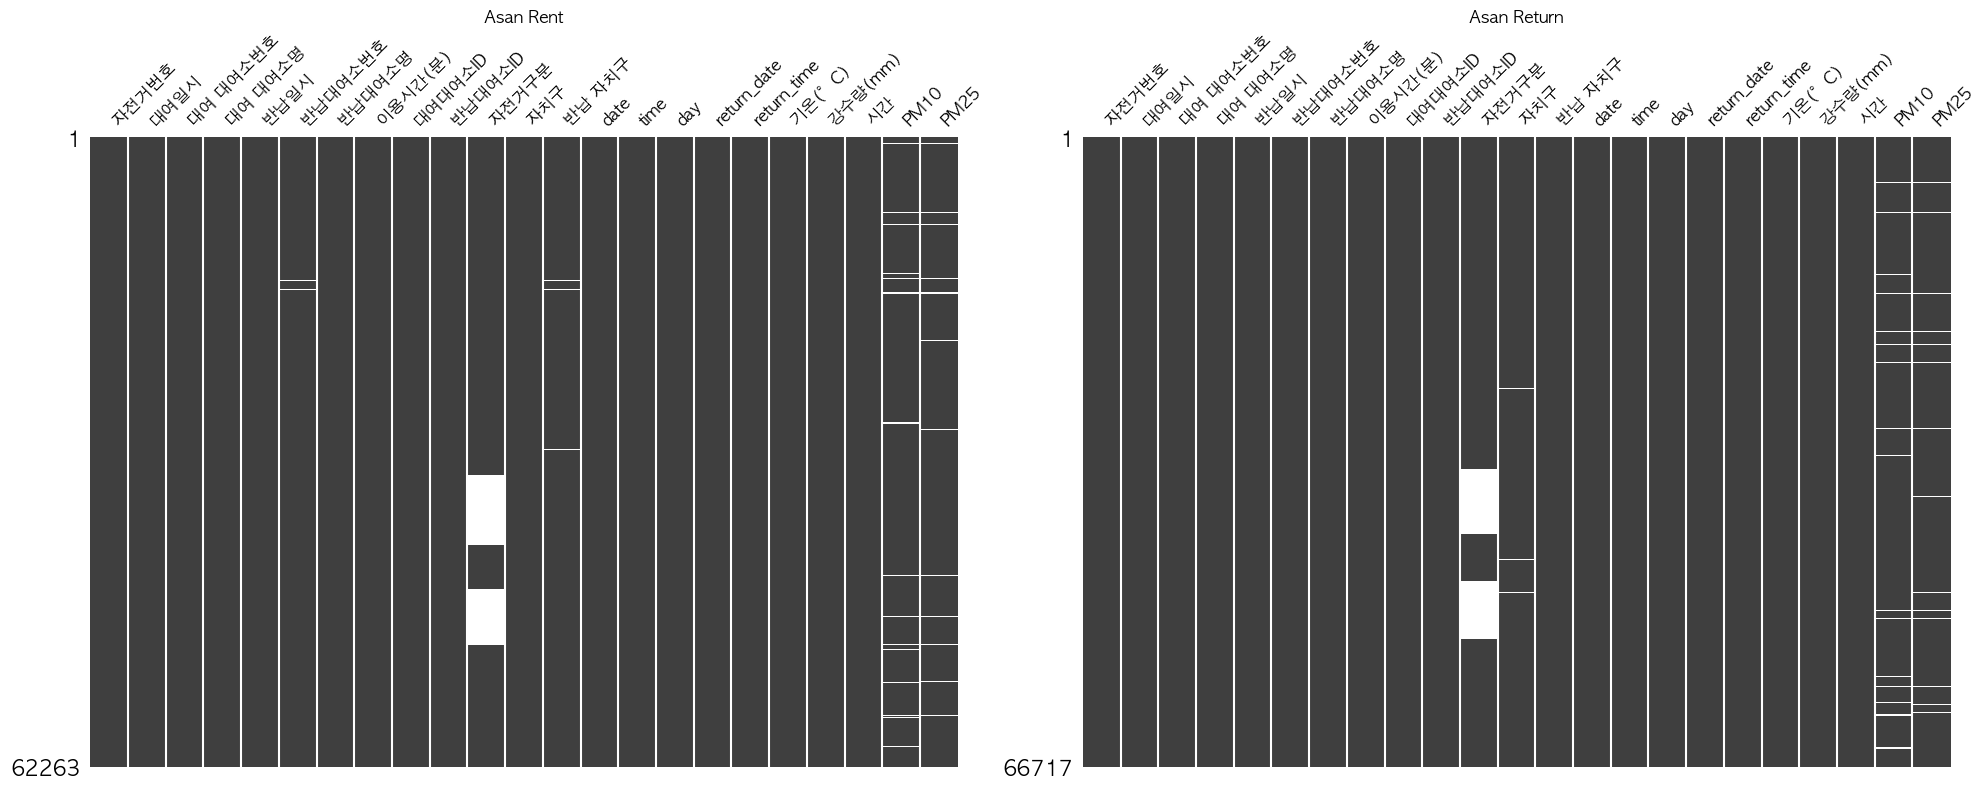

In [76]:
import missingno as msno 

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot missingno matrix for asan_rent
msno.matrix(asan_rent, ax=ax[0], fontsize=12)
ax[0].set_title('Asan Rent')

# Plot missingno matrix for asan_return
msno.matrix(asan_return, ax=ax[1], fontsize=12)
ax[1].set_title('Asan Return')

plt.tight_layout()
plt.show()

### 결측치 제거 작업
- 자전거 구분(일반/새싹): 자전거번호가 같은 데이터 중 null이 아닌 데이터의 자전거구분으로 대치
- 자치구/반납자치구: 대여소명 또는 대여소번호가 같은 데이터 중 둘 중 null이 아닌 데이터 중 하나로 대치
- PM10/PM25: bfill

In [77]:
asan_rent = asan_rent.reset_index(drop=True)
asan_return = asan_return.reset_index(drop=True)

In [78]:
def replace_nulls(df):
    # 데이터프레임 복사본 생성
    
    # 각 자전거번호별로 결측치 채우기
    for bike_no in df['자전거번호'].unique():
        # 해당 자전거의 모든 데이터 가져오기
        mask = df['자전거번호'] == bike_no
        # 해당 자전거의 non-null 값 찾기
        non_null_value = df.loc[mask, '자전거구분'].dropna().iloc[0] if any(df.loc[mask, '자전거구분'].notna()) else None
        # 결측치 채우기
        df.loc[mask & df['자전거구분'].isna(), '자전거구분'] = non_null_value
    
    return df

In [79]:
asan_list=[asan_rent, asan_return]

for data in asan_list:
    data=replace_nulls(data)

In [80]:
asan_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62263 entries, 0 to 62262
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자전거번호        62263 non-null  object 
 1   대여일시         62263 non-null  object 
 2   대여 대여소번호     62263 non-null  int64  
 3   대여 대여소명      62263 non-null  object 
 4   반납일시         62263 non-null  object 
 5   반납대여소번호      62027 non-null  float64
 6   반납대여소명       62263 non-null  object 
 7   이용시간(분)      62263 non-null  int64  
 8   대여대여소ID      62263 non-null  object 
 9   반납대여소ID      62263 non-null  object 
 10  자전거구분        57157 non-null  object 
 11  자치구          62263 non-null  object 
 12  반납 자치구       61926 non-null  object 
 13  date         62263 non-null  object 
 14  time         62263 non-null  int64  
 15  day          62263 non-null  object 
 16  return_date  62263 non-null  object 
 17  return_time  62263 non-null  int64  
 18  기온(°C)       62263 non-null  float64
 19  강수량(

In [81]:
asan_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66717 entries, 0 to 66716
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자전거번호        66717 non-null  object 
 1   대여일시         66717 non-null  object 
 2   대여 대여소번호     66717 non-null  int64  
 3   대여 대여소명      66717 non-null  object 
 4   반납일시         66717 non-null  object 
 5   반납대여소번호      66717 non-null  float64
 6   반납대여소명       66717 non-null  object 
 7   이용시간(분)      66717 non-null  int64  
 8   대여대여소ID      66717 non-null  object 
 9   반납대여소ID      66717 non-null  object 
 10  자전거구분        61684 non-null  object 
 11  자치구          66643 non-null  object 
 12  반납 자치구       66717 non-null  object 
 13  date         66717 non-null  object 
 14  time         66717 non-null  int64  
 15  day          66717 non-null  object 
 16  return_date  66717 non-null  object 
 17  return_time  66717 non-null  int64  
 18  기온(°C)       66717 non-null  float64
 19  강수량(

In [82]:
def fill_missing_gu_with_grouped_values(df):
    
    for station in df['반납대여소명'].unique():
        mask = df['반납대여소명'] == station
        non_null_value = df.loc[mask, '반납 자치구'].dropna().iloc[0] if any(df.loc[mask, '반납 자치구'].notna()) else None
        df.loc[mask & df['반납 자치구'].isna(), '반납 자치구'] = non_null_value
    
    return df
def fill_missing_gu_values(df):
    
    for station in df['대여 대여소명'].unique():
        mask = df['대여 대여소명'] == station
        non_null_value = df.loc[mask, '자치구'].dropna().iloc[0] if any(df.loc[mask, '자치구'].notna()) else None
        df.loc[mask & df['자치구'].isna(), '자치구'] = non_null_value
    
    return df

In [83]:
for data in asan_list:
    data=fill_missing_gu_with_grouped_values(data)

In [84]:
for data in asan_list:
    data=fill_missing_gu_values(data)

In [85]:
for data in asan_list:
    data['PM10'].ffill(inplace=True)
    data['PM25'].ffill(inplace=True)

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2945/3224164447.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PM10'].ffill(inplace=True)
/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_2945/3224164447.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

/opt/anaconda3/lib/python3.12/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


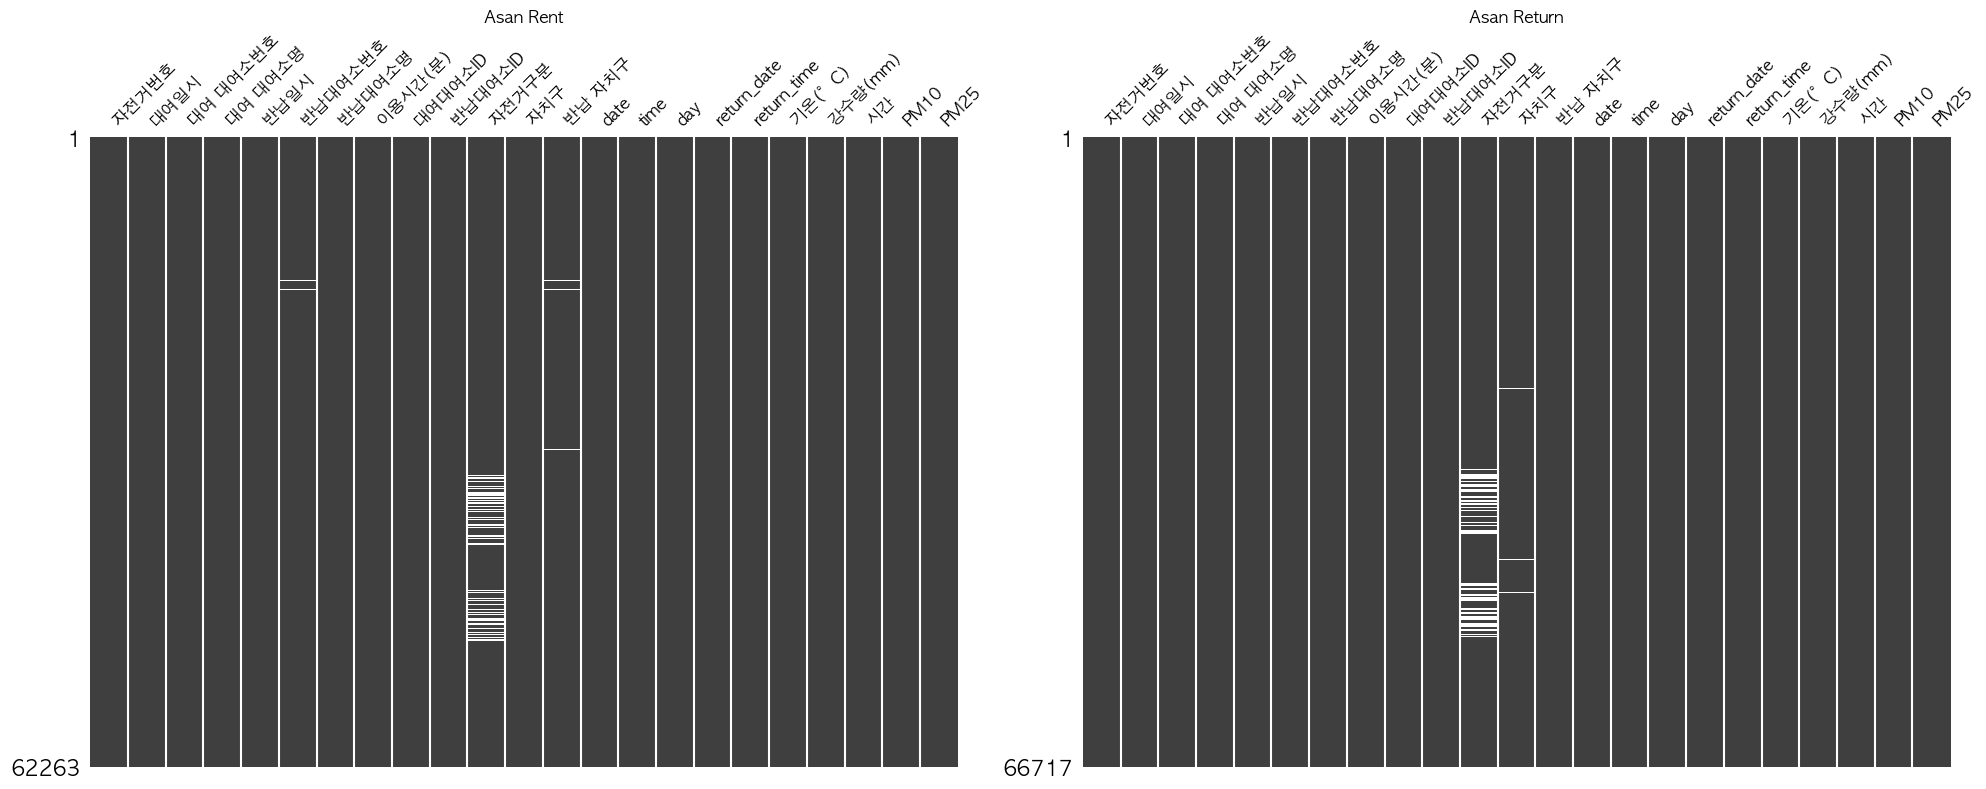

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot missingno matrix for asan_rent
msno.matrix(asan_rent, ax=ax[0], fontsize=12)
ax[0].set_title('Asan Rent')

# Plot missingno matrix for asan_return
msno.matrix(asan_return, ax=ax[1], fontsize=12)
ax[1].set_title('Asan Return')

plt.tight_layout()
plt.show()

In [87]:
def fill_missing_gu_with_grouped_values(df):
    
    for station in df['반납대여소명'].unique():
        mask = df['반납대여소명'] == station
        # non-null 값이 있는지 먼저 확인
        non_null_values = df.loc[mask, '반납 자치구'].dropna()
        if len(non_null_values) > 0:
            # non-null 값이 있는 경우에만 결측치 채우기
            non_null_value = non_null_values.iloc[0]
            df.loc[mask & df['반납 자치구'].isna(), '반납 자치구'] = non_null_value

In [88]:
fill_missing_gu_with_grouped_values(asan_rent)

In [89]:
asan_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62263 entries, 0 to 62262
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자전거번호        62263 non-null  object 
 1   대여일시         62263 non-null  object 
 2   대여 대여소번호     62263 non-null  int64  
 3   대여 대여소명      62263 non-null  object 
 4   반납일시         62263 non-null  object 
 5   반납대여소번호      62027 non-null  float64
 6   반납대여소명       62263 non-null  object 
 7   이용시간(분)      62263 non-null  int64  
 8   대여대여소ID      62263 non-null  object 
 9   반납대여소ID      62263 non-null  object 
 10  자전거구분        57157 non-null  object 
 11  자치구          62263 non-null  object 
 12  반납 자치구       61926 non-null  object 
 13  date         62263 non-null  object 
 14  time         62263 non-null  int64  
 15  day          62263 non-null  object 
 16  return_date  62263 non-null  object 
 17  return_time  62263 non-null  int64  
 18  기온(°C)       62263 non-null  float64
 19  강수량(

In [90]:
for data in asan_list:
    data.drop(
        ['대여 대여소번호','반납대여소번호','대여대여소ID','반납대여소ID'],
        axis=1,
        inplace=True
    )

/opt/anaconda3/lib/python3.12/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


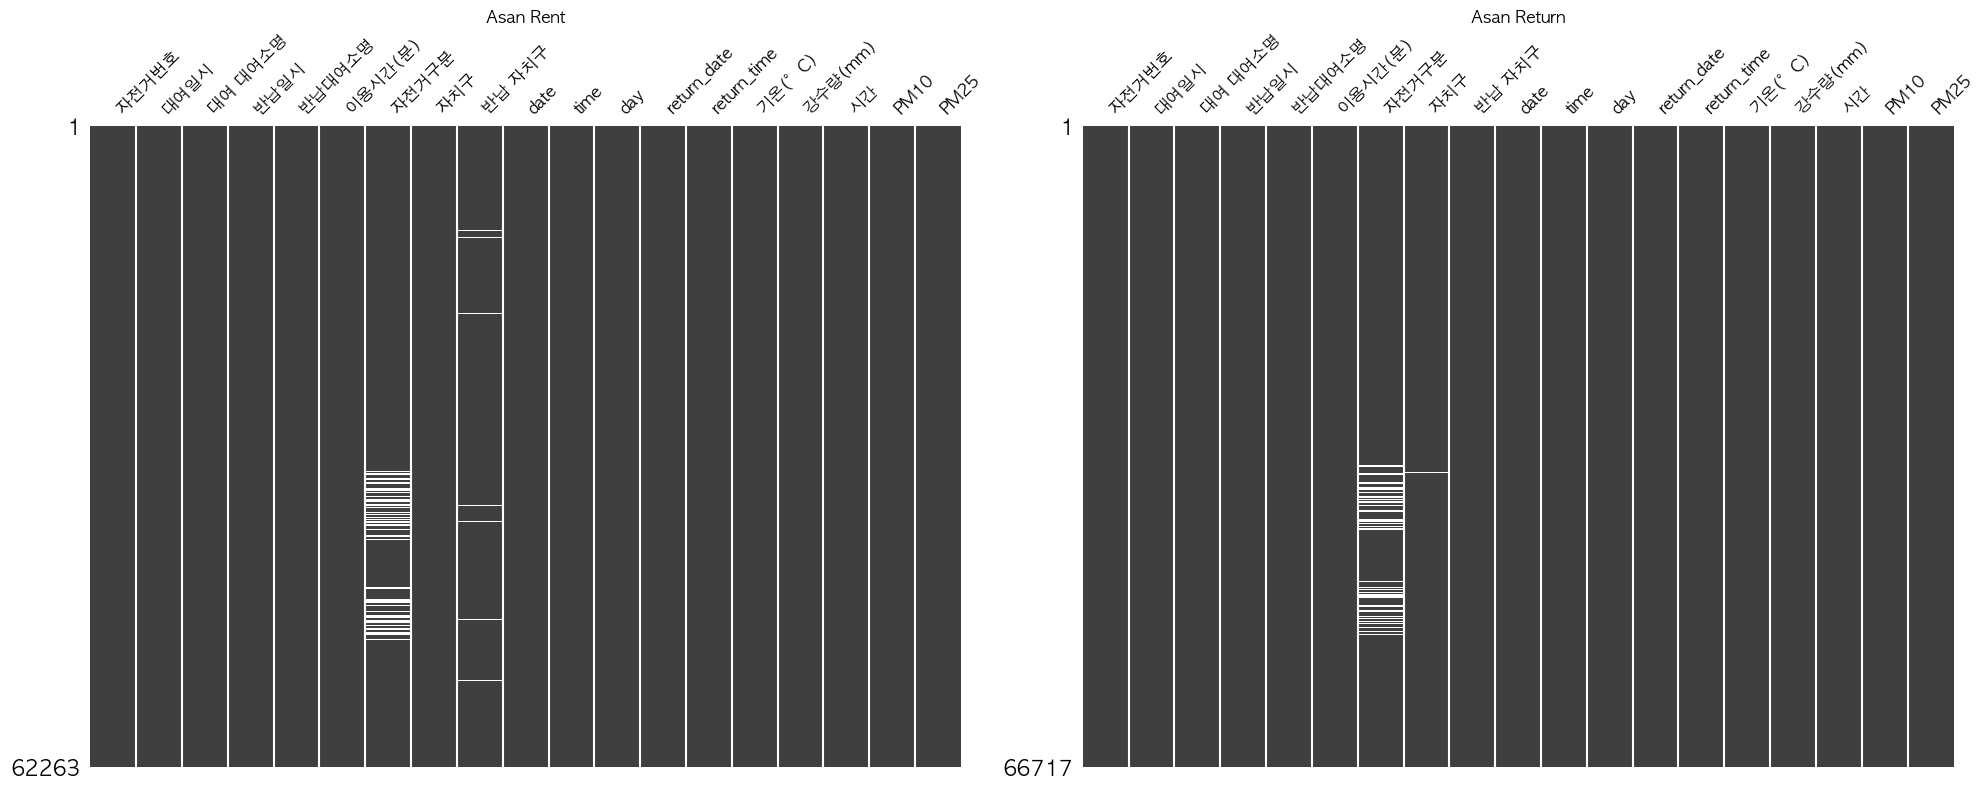

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot missingno matrix for asan_rent
msno.matrix(asan_rent, ax=ax[0], fontsize=12)
ax[0].set_title('Asan Rent')

# Plot missingno matrix for asan_return
msno.matrix(asan_return, ax=ax[1], fontsize=12)
ax[1].set_title('Asan Return')

plt.tight_layout()
plt.show()

In [92]:
asan_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62263 entries, 0 to 62262
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자전거번호        62263 non-null  object 
 1   대여일시         62263 non-null  object 
 2   대여 대여소명      62263 non-null  object 
 3   반납일시         62263 non-null  object 
 4   반납대여소명       62263 non-null  object 
 5   이용시간(분)      62263 non-null  int64  
 6   자전거구분        57157 non-null  object 
 7   자치구          62263 non-null  object 
 8   반납 자치구       61926 non-null  object 
 9   date         62263 non-null  object 
 10  time         62263 non-null  int64  
 11  day          62263 non-null  object 
 12  return_date  62263 non-null  object 
 13  return_time  62263 non-null  int64  
 14  기온(°C)       62263 non-null  float64
 15  강수량(mm)      62263 non-null  float64
 16  시간           62263 non-null  int64  
 17  PM10         62263 non-null  float64
 18  PM25         62263 non-null  float64
dtypes: f

> 자전거구분의 null값을 채운 후에도 null값이 5000개 이상으로 비교적 많다.   
아산병원 기숙사 부근의 자전거는 일반자전거에 비해 새싹자전거의 비율이 매우 낮으므로 해당 데이터들을 모두 제거하는 것보다는 자전거구분 컬럼을 삭제해주는 것이 더 좋을 것이라 판단하였다.

In [93]:
for data in asan_list:
    data.drop(
        '자전거구분',
        axis=1,
        inplace=True
    )

In [94]:
for data in asan_list:
    print(data['강수량(mm)'].unique())

[ 0.   0.3  0.2  0.4  0.1  0.7  0.5  0.8  1.   0.9  0.6  2.1  3.1  2.4
  2.6  1.2  2.2  3.   3.2  6.2  1.8  2.9  2.7  1.7  4.8  1.1 10.2  4.5
  1.5  2.   8.2  4.4  1.6  7.   5.1  3.3  1.9  7.5  1.3  3.8  2.3 10.1
  2.8 12.7  7.1 34.7  8.3  5.6  9.6  1.4  5.5 20.   4.9  9.3 30.2  4.6
  9.8  4.3  2.5  7.7 10.6 27.6 13.3  9.1  3.5 28.   6.8  7.9  3.9]
[ 0.   4.2  0.3  0.6  0.4  0.1  0.2  0.8  0.7  1.   0.5  1.5  1.7  0.9
  4.8  2.9  2.2  2.4  2.7  2.   6.2  5.   1.8  3.5  4.3  2.1  3.1  1.1
  1.4  4.5  7.3  8.2  4.4  1.6 19.   7.   5.1  1.3  1.9  7.5  1.2 10.1
 10.2  2.8 11.5  4.1 34.7  5.6  9.6  9.   2.3  5.5 20.   4.9 11.9 30.2
  4.6  4.   9.8  2.5  3.3  9.3 27.6  5.2 13.3  5.4 28.   8.8  3.9]


In [95]:
asan_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66717 entries, 0 to 66716
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자전거번호        66717 non-null  object 
 1   대여일시         66717 non-null  object 
 2   대여 대여소명      66717 non-null  object 
 3   반납일시         66717 non-null  object 
 4   반납대여소명       66717 non-null  object 
 5   이용시간(분)      66717 non-null  int64  
 6   자치구          66643 non-null  object 
 7   반납 자치구       66717 non-null  object 
 8   date         66717 non-null  object 
 9   time         66717 non-null  int64  
 10  day          66717 non-null  object 
 11  return_date  66717 non-null  object 
 12  return_time  66717 non-null  int64  
 13  기온(°C)       66717 non-null  float64
 14  강수량(mm)      66717 non-null  float64
 15  시간           66717 non-null  int64  
 16  PM10         66717 non-null  float64
 17  PM25         66717 non-null  float64
dtypes: float64(4), int64(4), object(10)
memory usa

> asan_rent/asan_return의 반납 자치구/자치구의 null값은 1% 미만이므로 해당 결측치가 있는 행들은 삭제하기로 했다.

In [96]:
asan_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62263 entries, 0 to 62262
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자전거번호        62263 non-null  object 
 1   대여일시         62263 non-null  object 
 2   대여 대여소명      62263 non-null  object 
 3   반납일시         62263 non-null  object 
 4   반납대여소명       62263 non-null  object 
 5   이용시간(분)      62263 non-null  int64  
 6   자치구          62263 non-null  object 
 7   반납 자치구       61926 non-null  object 
 8   date         62263 non-null  object 
 9   time         62263 non-null  int64  
 10  day          62263 non-null  object 
 11  return_date  62263 non-null  object 
 12  return_time  62263 non-null  int64  
 13  기온(°C)       62263 non-null  float64
 14  강수량(mm)      62263 non-null  float64
 15  시간           62263 non-null  int64  
 16  PM10         62263 non-null  float64
 17  PM25         62263 non-null  float64
dtypes: float64(4), int64(4), object(10)
memory usa

In [98]:
asan_rent.dropna(subset=['반납 자치구'], inplace=True)
asan_return.dropna(subset=['자치구'], inplace=True)

In [99]:
asan_return.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66643 entries, 0 to 66716
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자전거번호        66643 non-null  object 
 1   대여일시         66643 non-null  object 
 2   대여 대여소명      66643 non-null  object 
 3   반납일시         66643 non-null  object 
 4   반납대여소명       66643 non-null  object 
 5   이용시간(분)      66643 non-null  int64  
 6   자치구          66643 non-null  object 
 7   반납 자치구       66643 non-null  object 
 8   date         66643 non-null  object 
 9   time         66643 non-null  int64  
 10  day          66643 non-null  object 
 11  return_date  66643 non-null  object 
 12  return_time  66643 non-null  int64  
 13  기온(°C)       66643 non-null  float64
 14  강수량(mm)      66643 non-null  float64
 15  시간           66643 non-null  int64  
 16  PM10         66643 non-null  float64
 17  PM25         66643 non-null  float64
dtypes: float64(4), int64(4), object(10)
memory usage: 9

In [100]:
asan_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61926 entries, 0 to 62262
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자전거번호        61926 non-null  object 
 1   대여일시         61926 non-null  object 
 2   대여 대여소명      61926 non-null  object 
 3   반납일시         61926 non-null  object 
 4   반납대여소명       61926 non-null  object 
 5   이용시간(분)      61926 non-null  int64  
 6   자치구          61926 non-null  object 
 7   반납 자치구       61926 non-null  object 
 8   date         61926 non-null  object 
 9   time         61926 non-null  int64  
 10  day          61926 non-null  object 
 11  return_date  61926 non-null  object 
 12  return_time  61926 non-null  int64  
 13  기온(°C)       61926 non-null  float64
 14  강수량(mm)      61926 non-null  float64
 15  시간           61926 non-null  int64  
 16  PM10         61926 non-null  float64
 17  PM25         61926 non-null  float64
dtypes: float64(4), int64(4), object(10)
memory usage: 9

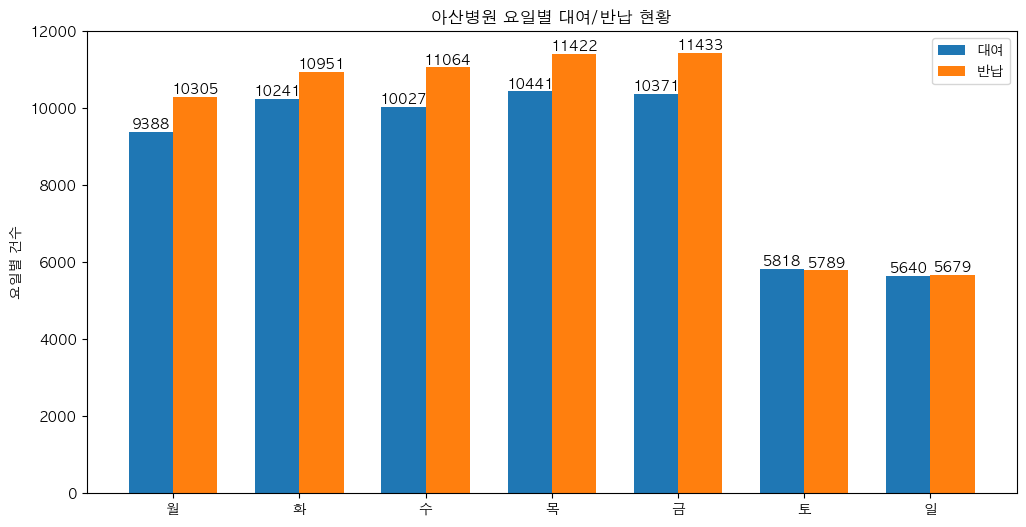

In [102]:
# 요일 순서 정의
day_order = ['월', '화', '수', '목', '금', '토', '일']

# 각 데이터프레임의 요일별 대여량 계산
rent_counts = asan_rent.groupby('day').size().reset_index(name='rent_count')
return_counts = asan_return.groupby('day').size().reset_index(name='return_count')

# 요일 순서 지정
rent_counts['day'] = pd.Categorical(rent_counts['day'], categories=day_order, ordered=True)
return_counts['day'] = pd.Categorical(return_counts['day'], categories=day_order, ordered=True)

# 데이터 정렬
rent_counts = rent_counts.sort_values('day')
return_counts = return_counts.sort_values('day')

# 그래프 그리기
plt.figure(figsize=(12, 6))
x = np.arange(len(day_order))
width = 0.35  # 막대 너비

# 두 개의 막대 그래프 생성
plt.bar(x - width/2, rent_counts['rent_count'], width, label='대여')
plt.bar(x + width/2, return_counts['return_count'], width, label='반납')

# x축 레이블 설정
plt.xticks(x, day_order)

# 각 막대 위에 값 표시
for i, v in enumerate(rent_counts['rent_count']):
    plt.text(i - width/2, v, str(v), ha='center', va='bottom')
for i, v in enumerate(return_counts['return_count']):
    plt.text(i + width/2, v, str(v), ha='center', va='bottom')

plt.ylabel('요일별 건수')
plt.title('아산병원 요일별 대여/반납 현황')
plt.legend()
plt.show()

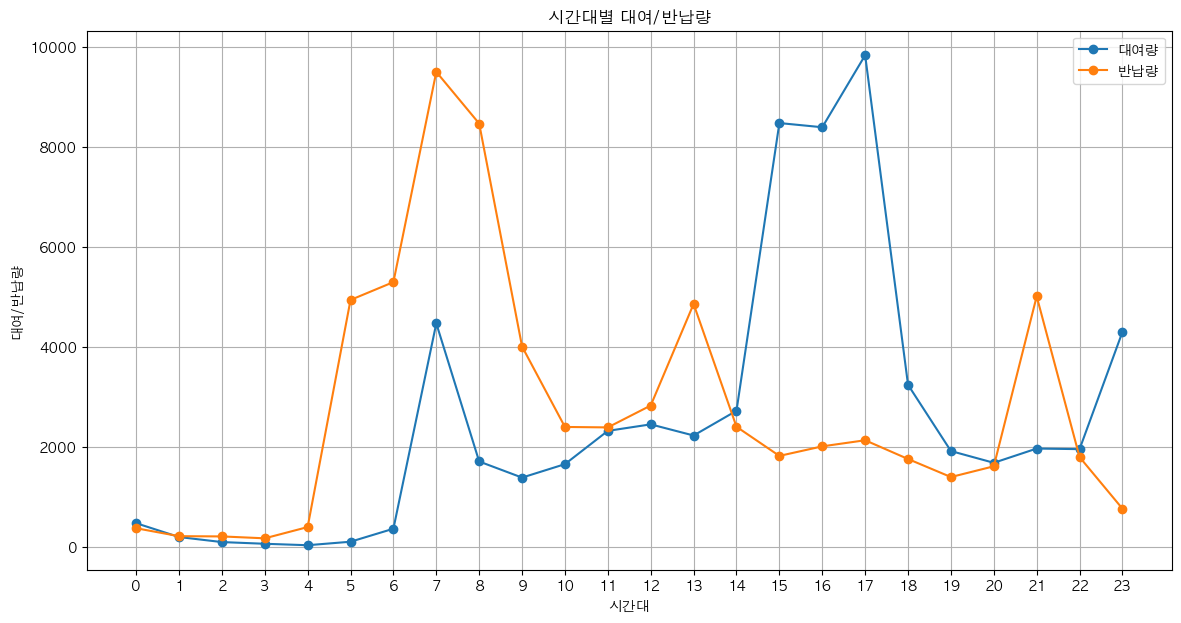

In [104]:
# 시간대별 데이터 추출
rent_by_hour = asan_rent['time'].value_counts().reset_index()
rent_by_hour.columns = ['hour', 'rent_count']
return_by_hour = asan_return['time'].value_counts().reset_index()
return_by_hour.columns = ['hour', 'return_count']

# 시간대 순으로 정렬
rent_by_hour = rent_by_hour.sort_values('hour')
return_by_hour = return_by_hour.sort_values('hour')

# 그래프 생성
plt.figure(figsize=(14, 7))

# 대여량과 반납량 그래프
plt.plot(rent_by_hour['hour'], rent_by_hour['rent_count'], marker='o', label='대여량')
plt.plot(return_by_hour['hour'], return_by_hour['return_count'], marker='o', label='반납량')

# 그래프 설정
plt.xticks(range(0, 24))
plt.xlabel('시간대')
plt.ylabel('대여/반납량')
plt.title('시간대별 대여/반납량')
plt.legend()
plt.grid(True)
plt.show()

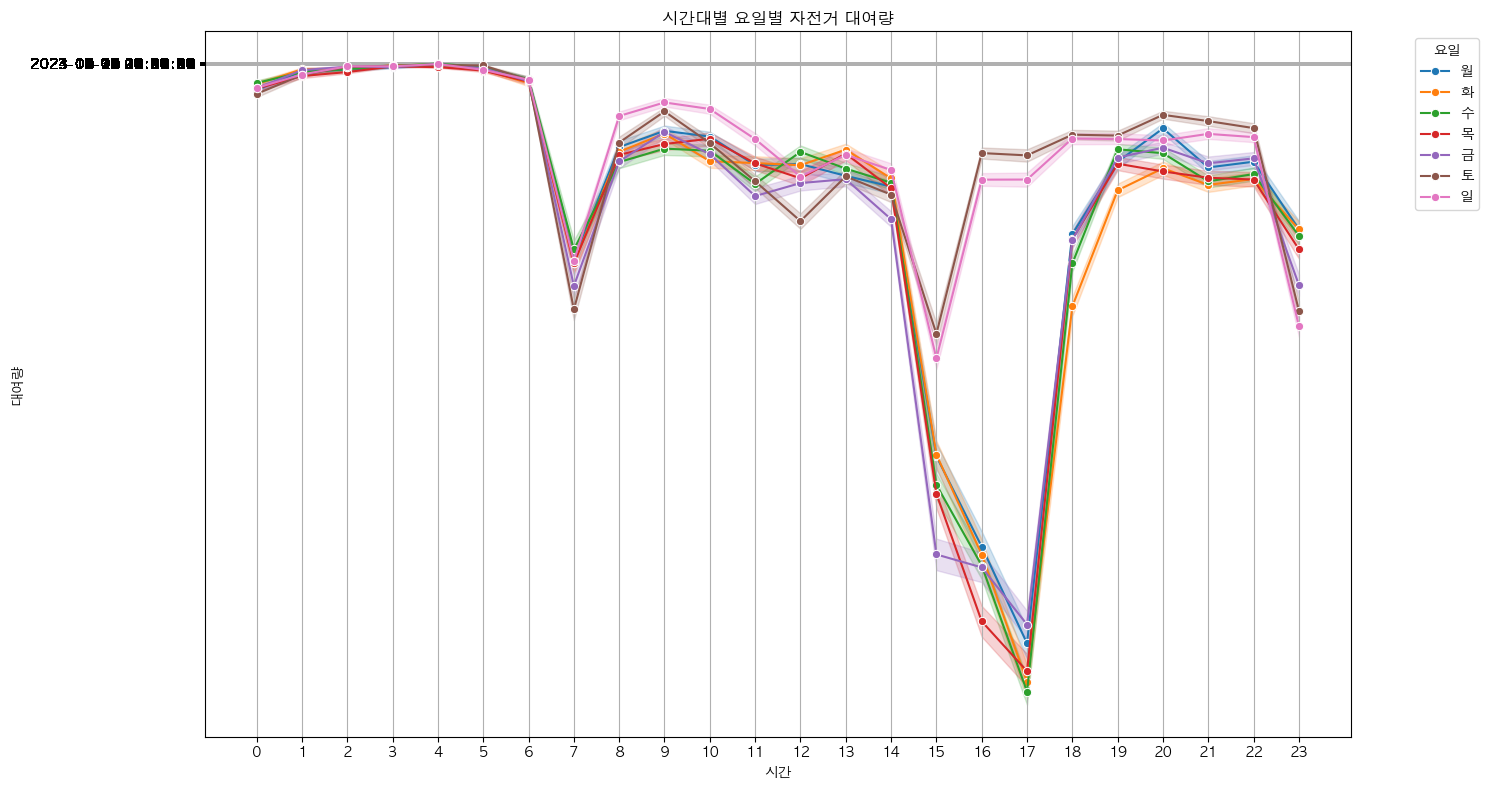

In [108]:
plt.figure(figsize=(15, 8))

# 대여량 그래프
sns.lineplot(data=asan_rent, 
            x='time', 
            y='대여일시',
            hue='day',
            hue_order=['월', '화', '수', '목', '금', '토', '일'],
            estimator='sum',
            marker='o')

# 그래프 설정
plt.title('시간대별 요일별 자전거 대여량')
plt.xlabel('시간')
plt.ylabel('대여량')
plt.xticks(range(0, 24))
plt.grid(True)

# 범례 위치 조정
plt.legend(title='요일', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [110]:
asan_rent['반납대여소명'].value_counts().nlargest(10)

반납대여소명
아산병원 기숙사 부근        4673
몽촌토성역 3번 출구        3480
풍납동 아이파크 107동 앞    2367
잠실나루역4번출구뒤         2359
천호역 10번 출구 앞       2095
잠실나루역 (2번 출구 쪽)    2011
강동구청 앞             1569
천호역효성해링턴타워 앞       1418
극동아파트              1410
한성백제역 1번출구 뒤       1371
Name: count, dtype: int64

In [112]:
asan_return['대여 대여소명'].value_counts().nlargest(10)

대여 대여소명
아산병원 기숙사 부근        4673
몽촌토성역 3번 출구        2935
풍납현대아파트쉼터          2573
잠실나루역4번출구뒤         2567
강동구청 앞             2203
풍납동 아이파크 107동 앞    2081
잠실나루역 (2번 출구 쪽)    2021
극동아파트              1999
천호역 10번 출구 앞       1935
한성백제역 1번출구 뒤       1718
Name: count, dtype: int64

> 아산병원 기숙사 부근에서 대여 후 다시 반납하는 경우가 가장 많고, 지하철역 부근에서 대여/반납하는 경우가 많다.     
> 출퇴근 이용자들이 많이 이용하여 지하철역 부근 data가 많은 것으로 추측된다.

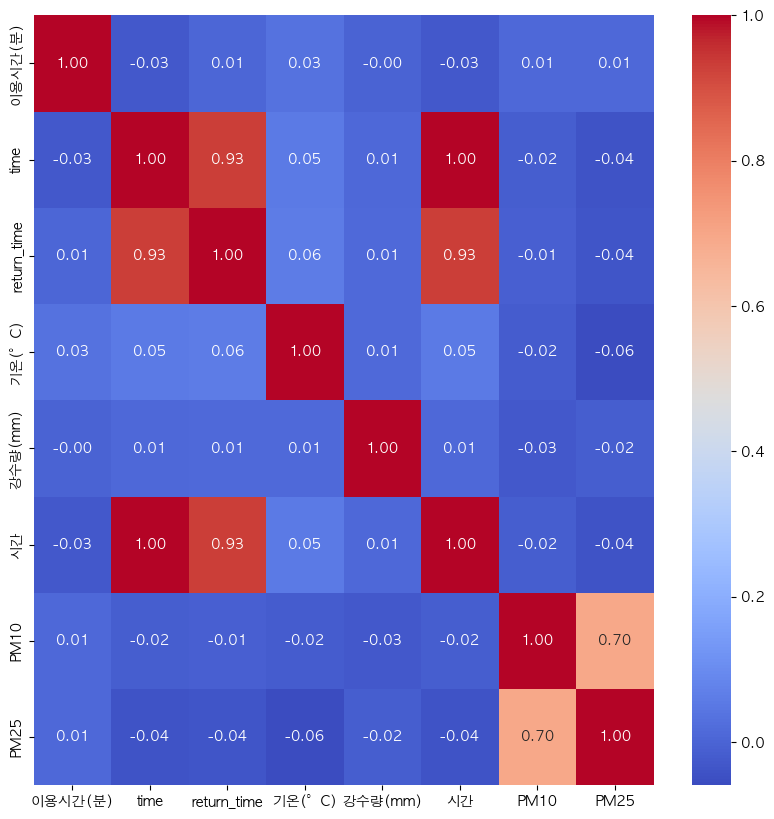

In [111]:
# 숫자형 데이터만 선택
numeric_df = asan_rent.select_dtypes(include=['number'])

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.show()

In [117]:
# 강수량이 3mm 이상인 데이터만 선택
rain_data = asan_rent[asan_rent['강수량(mm)'] >= 3]

# 필요한 수치형 컬럼들만 선택하여 상관관계 계산
numeric_columns = rain_data.select_dtypes(include=['float64', 'int64']).columns
correlation = rain_data[numeric_columns].corr()

print(correlation)

              이용시간(분)      time  return_time    기온(°C)   강수량(mm)        시간  \
이용시간(분)      1.000000  0.017502     0.096871  0.090382  0.007287  0.017502   
time         0.017502  1.000000     0.988818  0.195981 -0.080048  1.000000   
return_time  0.096871  0.988818     1.000000  0.195209 -0.072219  0.988818   
기온(°C)       0.090382  0.195981     0.195209  1.000000  0.246302  0.195981   
강수량(mm)      0.007287 -0.080048    -0.072219  0.246302  1.000000 -0.080048   
시간           0.017502  1.000000     0.988818  0.195981 -0.080048  1.000000   
PM10        -0.126530 -0.012174    -0.014997 -0.142343  0.438754 -0.012174   
PM25        -0.120831 -0.056317    -0.059421 -0.265796  0.385796 -0.056317   

                 PM10      PM25  
이용시간(분)     -0.126530 -0.120831  
time        -0.012174 -0.056317  
return_time -0.014997 -0.059421  
기온(°C)      -0.142343 -0.265796  
강수량(mm)      0.438754  0.385796  
시간          -0.012174 -0.056317  
PM10         1.000000  0.927860  
PM25         0.927860  1.

---
**year, month** column 추가

In [119]:
print(asan_rent['반납 자치구'].value_counts().nlargest(10))
print()
print(asan_return['자치구'].value_counts().nlargest(10))

반납 자치구
송파구     39038
강동구     19711
광진구      1617
강남구       824
성동구       315
중랑구       133
서초구       111
동작구        39
용산구        34
동대문구       26
Name: count, dtype: int64

자치구
송파구    42312
강동구    21759
광진구     1523
강남구      528
성동구      144
중랑구      117
중구       100
서초구       70
동작구       24
용산구       23
Name: count, dtype: int64
